# Práctica 2 - Aprendizaje Automático (Arbol de Decisión)

## Introducción

Se debe realizar un reconocedor de números escritos a mano (un OCR de números). Para ello, se asume hecha la parte de visión computacional (detección de texto en la imagen, recorte de caracteres y normalización de la imagen) y nuestro data set contendrá ejemplos de números con un formato de imágenes de 8 x 8 píxeles (que se vectoriza en un vector de 64 posiciones con un recorrido de la imagen por filas desde la esquina superior izquierda) donde el valor de cada píxel está dentro del rango 0 (negro) - 16 (blanco).

Por tanto, hacer el reconocedor de caracteres es lo mismo que dada una nueva imagen recortada, clasificar esta imagen en la clase correspondiente al número, es decir, tendremos 10 clases, del “0” al “9”.

#### Dataset

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

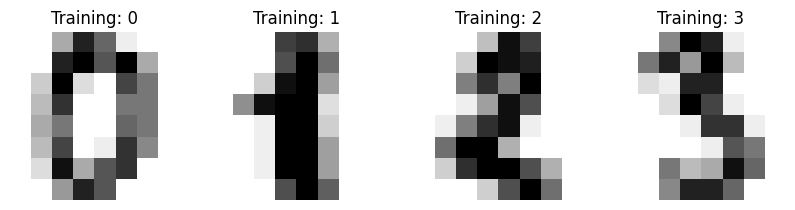

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

#### Entrenamiento

In [3]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

#Se dividen los datos del dataset, el 50% para entrenamiento (X_train, y_train) 
#y el otro 50% para los test (X_test,y_test)
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, random_state=42,shuffle=False
)

In [4]:
tree = DecisionTreeClassifier();
tree.fit(X_train,y_train);

#### Predicción

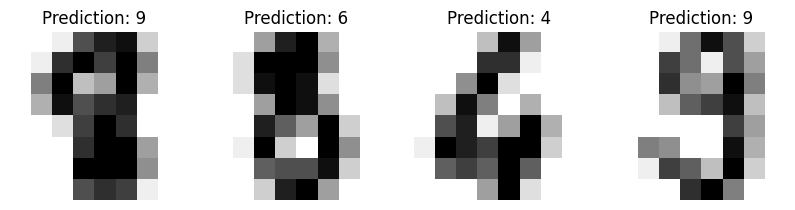

In [5]:
#Se hace la prediccion con los datos de testeo
y_pred = tree.predict(X_test)
#Algunas predicciones
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):  
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")  

In [6]:
print(
    f"Classification report for classifier {tree}:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
)

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        88
           1       0.80      0.62      0.70        91
           2       0.87      0.71      0.78        86
           3       0.66      0.70      0.68        91
           4       0.87      0.84      0.85        92
           5       0.62      0.78      0.69        91
           6       0.87      0.88      0.87        91
           7       0.89      0.80      0.84        89
           8       0.57      0.64      0.60        88
           9       0.66      0.75      0.70        92

    accuracy                           0.76       899
   macro avg       0.78      0.76      0.77       899
weighted avg       0.78      0.76      0.77       899




Confusion matrix:
[[82  0  0  0  1  3  0  0  1  1]
 [ 0 56  4  8  6  1  0  2  7  7]
 [ 1  3 61  8  0  0  3  0  7  3]
 [ 0  4  3 64  0  3  0  4  8  5]
 [ 1  0  0  0 77  4  4  1  4  1]
 [ 0  1  0  2  1 71  1  0  0 15]
 [ 0  1  0  0  1  0 80  0  9  0]
 [ 0  1  0  8  0  8  0 71  0  1]
 [ 0  2  2  4  3 13  4  2 56  2]
 [ 0  2  0  3  0 12  0  0  6 69]]


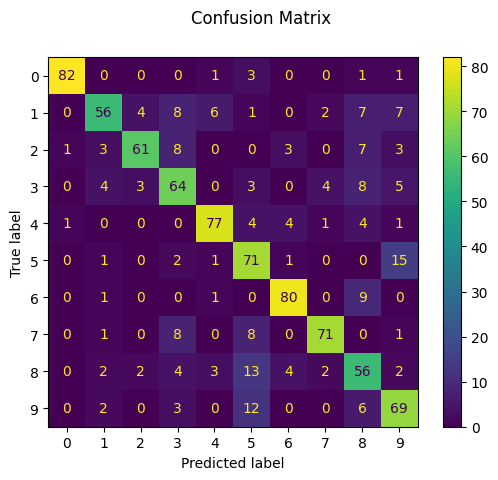

In [7]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()